### Propensity Parameter:  Generally-active vs available-and-participating population

We now add one parameter in our model, to capture the fact that propensity to participate in the survey may vary among workers. This propensity value captures both the inherent preference to participate in a survey, versus working on some other task, but also the general activity on the platform. For example, consider two workers that are equally likely to work on a survey; however, one of them works on the platform only one hour per week, while the other works for ten hours. Everything else being equal, the latter is ten times more likely to show up in our results.

For our model, we endow each user with a propensity parameter $a$, which defines the probability that a user will be **active and willing to participate in the survey** at any given time. The propensity parameter is a random variable with a pdf $p(a)$. Past literature suggests that the pdf $p(a)$ is a heavy tailed distribution, with many people participating only occasionally, and a small number of users are active substantially more. However, in our approach we do not make any strong assumptions about the specifics of the distribution.

#### Capture stage

If we have a population of $N$ users (not all of them active at the same time), each of them with a propensity $a_i$, then each user will be chosen by a probability proportional to $a_i$. 

$P( \mathit{capture} | a_i) = \frac{a_i}{\sum_j^N a_j} = \frac{a_i}{N \cdot E[a]}$.

So, the probability that we see worker $i$ in a sample of $n_1$ workers is the inverse of the probability of not-sampling the worker for $n_1$ samples:

$P( \mathit{sample} | a_i) = 1 - (1 - \frac{a_i}{\sum_j^N a_j})^{n_1} \approx \frac{n_1}{N} \cdot \frac{a_i}{E[a]} $

Given $a_i$, the probability of capturing the user in a second sample with $n_2$ workers is _conditionally_ independent, and therefore, the probability that a user will be captured in both the first and the second sample is:

$P( \mathit{capture},  \mathit{recapture} | a_i) = \frac{n_1}{N} \cdot \frac{a_i}{E[a]} \cdot \frac{n_2}{N} \cdot \frac{a_i}{E[a]} = \frac{n_1 \cdot n_2}{N^2 \cdot \left( E[a] \right)^2} \dot a_i^2 $

So, now we can form the expectation on the size of the intersection by integrating over all the possible workers:

$\sum_j^N P( \mathit{capture},  \mathit{recapture} | a_j) = 
N \cdot \int_0^1 P( \mathit{capture},  \mathit{recapture} | a)\cdot p(a) \, da =  
N \cdot \frac{n_1 \cdot n_2}{N^2 \cdot \left( E[a] \right)^2} \int_0^1 a^2 \cdot p(a) \, da = 
N \cdot \frac{n_1}{N} \cdot \frac{n_2}{N} \cdot \frac{E[a^2]}{E[a]^2}  = 
N \cdot \frac{n_1}{N} \cdot \frac{n_2}{N} \cdot \frac{Var(a) + E[a]^2}{E[a]^2} =  
N \cdot \frac{n_1}{N} \cdot \frac{n_2}{N} \cdot \left( 1 + \frac{Var(a)}{E[a]^2} \right) $

Notice that the vanilla capture-recapture considers the size of the intersection to be equal to $\frac{n_1}{N} \cdot \frac{n_2}{N}$. Notice that the factor $1 + \frac{Var(a)}{E[a]^2}$ becomes 1 when the variance $Var(a)$ of the propensity variable $a$ becomes zero. Therefore, when the propensity to be "captured" is the same across the population, or even when the variance is small compared to the mean propensity, the naive estimate is valid. However, when the ratio of standard deviation to the mean becomes big, then we start seeing systematic deviations. 

Intuition: When someone is sampled under our scheme, probabilistically that user is likely to have higher propensity to participate. Therefore, in the recapture period, we are more likely to sample the same people again. This leads to capture-recapture estimates for the population size $N$ that are systematically biased downwards.

* Example with propensity $a=0.5$ for everyone.
* Example with propensity uniform in the [0,1] interval. Average propensity is again $a=0.5$.
* Example with propensity following a Beta(a,b) with $a=b$ (i.e., $E[a]=0.5$), and $a \rightarrow 0$. Variance goes to $1/4$, and the naive estimate of the population is off by a factor of 2.
* Show example with heavy tailed distribution (e.g., $b=1$, $a=0.01$), showing that this can distort estimates significantly.

Generalizing the above, the factor $E[a^k] / E[a]^k$ factor that differentes the expected size of the intersection between $k$ sets when propensity is a random varialbe, and the naive estimate, which assumes that propensity is the same (or almost the same) across all members of the population.

In [1]:
# Create the overall population: Sample N users and give to each an activity/propensity value a

# Compute the average number of people that we expect to be active during that time. 
# That is the mean value of the distribution

# ===================

# Capture period

# Draw user from the population

# If user is active (random<a) proceed, else go to step 2

# Sample the user with probability 1/active users, and add id in the list

# Re-Capture period

# Repeat as above and compute estimate of population using the Lincoln estimator



In [37]:
# To instantiate using various probability functions take a look at 
# https://docs.scipy.org/doc/scipy/reference/stats.html
import numpy as np
from scipy.stats import beta

N = 500000
a = 0.3
b = 38
rvs = beta.rvs(a, b, loc= 0.02941, scale= 2.44, size=N)

# This transformation can help us transform any continuous RV 
# into a value ranging from 0 to 1
# p = [math.exp(rv)/(1+math.exp(rv)) for rv in rvs]
# The scipy.stats.rv_histogram should help us then transform the empirical
# values into an empirical distribution

mean, var, skew = beta.stats(a, b,  moments='mvs')
# For powerlaw on a bounded interval 0..1, it is a special case of Beta with b=1

print("Mean:", mean)
print("Var:", var)
print("Skew:", skew)
print("X1:", mean)
print("X2:", var+mean*mean)
print("X3:", skew*var*np.sqrt(var) + 3*mean*var + mean*mean*mean )
print("Common:", var+mean*mean)

factor = (var+mean*mean) / (mean*mean)
factor2 = (skew*var*np.sqrt(var) + 3*mean*var + mean*mean*mean) / ((var+mean*mean)*mean)
print("Factor:", factor )
print("Factor2:", factor2 )

Mean: 0.00783289817232376
Var: 0.0001977492081054903
Skew: 3.4738427007709096
X1: 0.00783289817232376
X2: 0.000259103501883
X3: 1.47875447725e-05
Common: 0.000259103501883
Factor: 4.22307039864
Factor2: 7.28618693135


In [38]:
sum(rvs)

24207.524724574003

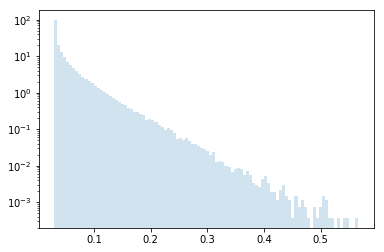

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.hist(rvs, normed=True, histtype='stepfilled', alpha=0.2, bins=100)
ax.set_yscale("log")

In [40]:
import numpy as np
# Given an instantiated list of propensity values 
# the mean of the distribution, and a sample target n, return the ids of the sampled entities
def sample(rvs, n):
    return sorted(np.random.choice(len(rvs), size = n, replace=True, p=rvs/sum(rvs)))


In [42]:
import statistics
from collections import Counter


tries = 200
adj_estimates = []
naive_estimates = []
for _ in range(tries):
    n = 10000
      
    
    id1 = set(sample(rvs, n))
    id2 = set(sample(rvs, n))
    common = list(id1 & id2)
    
    #id3 = set(sample(rvs, n))
    #triad = list(id1 & id2 & id3)
    
     
    naive_estimate = len(id1) * len(id2) / len(common)
    #naive_estimate = len(common) * len(id3) / len(triad)
    naive_estimates.append(naive_estimate)
    
    adj_estimate = naive_estimate * factor
    adj_estimates.append(adj_estimate)                       
    
print("Naive Median:", statistics.median(naive_estimates))
print("Naive Mean:", statistics.mean(naive_estimates))
                                 
print("Adj Median:", statistics.median(adj_estimates))
print("Adj Mean:", statistics.mean(adj_estimates))

Naive Median: 340343.36842105264
Naive Mean: 342745.69622372446
Adj Median: 1437294.00455
Adj Mean: 1447439.20398


(array([  8.85728132e-07,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   4.42864066e-07,   0.00000000e+00,
          8.85728132e-07,   0.00000000e+00,   4.42864066e-07,
          1.32859220e-06,   1.32859220e-06,   2.65718440e-06,
          2.65718440e-06,   3.54291253e-06,   3.10004846e-06,
          5.75723286e-06,   3.10004846e-06,   4.87150472e-06,
          5.31436879e-06,   5.31436879e-06,   5.31436879e-06,
          3.54291253e-06,   4.87150472e-06,   3.10004846e-06,
          3.98577659e-06,   3.10004846e-06,   3.54291253e-06,
          3.54291253e-06,   2.21432033e-06,   1.32859220e-06,
          1.77145626e-06,   2.21432033e-06,   8.85728132e-07,
          1.32859220e-06,   2.65718440e-06,   8.85728132e-07,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.42864066e-07,   0.00000000e+00,   8.85728132e-07,
          0.00000000e+00,   4.42864066e-07,   0.00000000e+00,
        

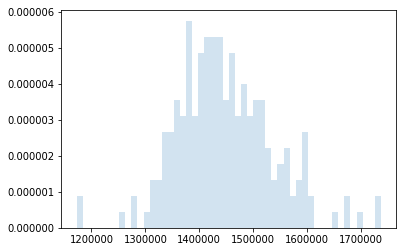

In [43]:
fig, ax = plt.subplots(1, 1)
ax.hist(adj_estimates, normed=True, histtype='stepfilled', alpha=0.2, bins=50)

In [30]:
from collections import Counter
sampled_ids = []
samples = 27
for _ in range(samples):
    s = set(sample(rvs, n))
    sampled_ids.extend(s)
z = Counter(Counter(sampled_ids).values())
z

Counter({1: 1779,
         2: 4581,
         3: 7543,
         4: 9228,
         5: 9099,
         6: 7004,
         7: 4718,
         8: 2727,
         9: 1381,
         10: 758,
         11: 383,
         12: 215,
         13: 121,
         14: 66,
         15: 33,
         16: 21,
         17: 10,
         18: 7,
         19: 3,
         21: 1})

In [31]:
for i in z.keys():
    print(i, z[i]/N, z[i+1]/z[i])

1 0.03558 2.57504215851602
2 0.09162 1.6465837153459943
3 0.15086 1.2233859207211986
4 0.18456 0.9860208062418726
5 0.18198 0.7697549181228707
6 0.14008 0.6736150770988006
7 0.09436 0.5779991521831285
8 0.05454 0.5064173083975064
9 0.02762 0.5488776249094859
10 0.01516 0.5052770448548812
11 0.00766 0.5613577023498695
12 0.0043 0.5627906976744186
13 0.00242 0.5454545454545454
14 0.00132 0.5
15 0.00066 0.6363636363636364
16 0.00042 0.47619047619047616
17 0.0002 0.7
18 0.00014 0.42857142857142855
19 6e-05 0.0
21 2e-05 0.0
